In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# remove warnings
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from kaleido.scopes.plotly import PlotlyScope

In [80]:
import pyaf.ForecastEngine as autof

In [81]:

# Read in the data
df = pd.read_csv('data\CSUSHPINSA.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
# add a unique index column
df['index'] = range(0, len(df))
df.set_index('index', inplace=True)
# rename the 'CSUSHPINSA' column to 'Price Index'
df.rename(columns={'CSUSHPINSA': 'Price Index'}, inplace=True)
df.head()


,DATE,Price Index
index,,
0,1987-01-01,63.734
1,1987-02-01,64.134
2,1987-03-01,64.469
3,1987-04-01,64.973
4,1987-05-01,65.547


In [82]:
# create a time delta variable equal to 1 month
one_month = pd.Timedelta('31 days')


In [83]:
# split the data into train and test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]
horizon = len(test)

In [91]:
test.shape

(12, 2)

In [84]:
# create a model
lEngine = autof.cForecastEngine()
lEngine

In [85]:
# get the best model
lEngine.train(train , 'DATE' , 'Price Index' , horizon)

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Price Index'], 'Transformations': [('Price Index', 'None', '_', 'T+S+R'), ('Price Index', 'None', 'Diff_', 'T+S+R'), ('Price Index', 'None', 'RelDiff_', 'T+S+R'), ('Price Index', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.41, ('SIGNAL_TRAINING', {'Signals': ['Price Index'], 'Transformations': [('Price Index', 'None', '_', 'T+S+R'), ('Price Index', 'None', 'Diff_', 'T+S+R'), ('Price Index', 'None', 'RelDiff_', 'T+S+R'), ('Price Index', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['Price Index'], 'Transformations': [('Price Index', [('Price Index', 'None', 'CumSum_', 'T+S+R'), ('Price Index', 'None', 'Diff_', 'T+S+R'), ('Price Index', 'None', 'RelDiff_', 'T+S+R'), ('Price Index', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'Price Index', 'T

In [86]:
# review the model
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='DATE' TimeMin=1987-01-01T00:00:00.000000 TimeMax=2014-04-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Price Index' Length=423  Min=63.734 Max=295.123  Mean=135.080229 StdDev=52.469958
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Price Index' Min=0.0 Max=1.0  Mean=0.308339 StdDev=0.226761
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Price Index_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Price Index_Lag1Trend_residue_zeroCycle[0.0]' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0058 MAPE_Forecast=0.0052 MAPE_Test=0.0156
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0058 SMAP

In [87]:
# review the model's performance
lEngine.mSignalDecomposition.mTrPerfDetails


,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,CumSum_Price Index,T+S+R,CumSum_Price Index_Lag1Trend_residue_zeroCycle...,"(CumSum_Price Index, T+S+R, None, CumSum_Price...",Integration_Lag1Trend_NoCycle_AR,67.0,0.0036,0.0032,0.0060
1,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_Seasonal_MonthO...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Seasonal_MonthOfYear_AR,78.0,0.0045,0.0036,0.0141
2,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_bestCycle_byMAP...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Cycle_12_AR,78.0,0.0045,0.0036,0.0141
3,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_Seasonal_MonthO...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Seasonal_MonthOfYear_NoAR,14.0,0.0046,0.0038,0.0146
4,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_bestCycle_byMAP...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Cycle_12_NoAR,14.0,0.0046,0.0038,0.0146
...,...,...,...,...,...,...,...,...,...,...
91,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_ConstantTrend_residue_Seas...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_ConstantTrend_Seasonal_Mont...,77.0,0.3822,0.6698,0.7653
92,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_LinearTrend_residue_Season...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_LinearTrend_Seasonal_MonthO...,78.0,0.3822,0.6698,0.7653
93,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_Lag1Trend_residue_Seasonal...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_Lag1Trend_Seasonal_MonthOfY...,79.0,0.3822,0.6698,0.7653
94,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_PolyTrend_residue_Seasonal...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_PolyTrend_Seasonal_MonthOfY...,80.0,0.3822,0.6698,0.7653


In [88]:
# look at the forecast
forecast_df = lEngine.forecast(test, horizon)
forecast_df.tail(12)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.085, ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))


,DATE,Price Index,row_number,DATE_Normalized,_Price Index,_Price Index_Lag1Trend,_Price Index_Lag1Trend_residue,_Price Index_Lag1Trend_residue_zeroCycle[0.0],_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue,_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR,...,Price Index_Forecast_Upper_Bound,Price Index_Forecast_Quantile_6,Price Index_Forecast_Quantile_17,Price Index_Forecast_Quantile_28,Price Index_Forecast_Quantile_39,Price Index_Forecast_Quantile_50,Price Index_Forecast_Quantile_61,Price Index_Forecast_Quantile_72,Price Index_Forecast_Quantile_83,Price Index_Forecast_Quantile_94
12,2023-04-01,NaN,12,1.330285,NaN,1.008445,NaN,0.0,NaN,0.0,...,299.801596,294.59460,295.18286,295.41376,295.75786,296.255,296.71004,296.84964,296.98602,297.29044
13,2023-05-01,NaN,13,1.333300,NaN,1.008445,NaN,0.0,NaN,0.0,...,302.238072,292.48932,293.36416,293.81652,294.50056,295.502,296.15236,296.65460,296.91418,297.48844
14,2023-06-01,NaN,14,1.336415,NaN,1.008445,NaN,0.0,NaN,0.0,...,304.501480,290.15692,291.80072,292.44736,293.35718,294.351,295.62738,296.08248,296.67382,297.73912
15,2023-07-01,NaN,15,1.339429,NaN,1.008445,NaN,0.0,NaN,0.0,...,306.597504,287.63436,290.64996,291.18556,292.10720,293.699,294.78086,295.75036,296.40644,297.56816
16,2023-08-01,NaN,16,1.342544,NaN,1.008445,NaN,0.0,NaN,0.0,...,308.526536,285.65860,289.33678,290.23088,291.61652,292.533,293.87542,295.00680,296.01584,297.35864
17,2023-09-01,NaN,17,1.345659,NaN,1.008445,NaN,0.0,NaN,0.0,...,310.274464,284.39512,288.76698,289.72348,290.52990,291.801,293.13504,294.42140,295.44286,296.73892
18,2023-10-01,NaN,18,1.348674,NaN,1.008445,NaN,0.0,NaN,0.0,...,311.824040,282.41196,288.36462,289.04176,290.10688,290.883,291.95282,293.39468,294.76502,296.45588
19,2023-11-01,NaN,19,1.351789,NaN,1.008445,NaN,0.0,NaN,0.0,...,313.210544,280.42844,287.77908,288.60480,289.39802,290.419,291.50554,292.44508,293.60312,295.33704
20,2023-12-01,NaN,20,1.354803,NaN,1.008445,NaN,0.0,NaN,0.0,...,314.479644,279.51396,287.45516,288.27584,289.10654,289.533,290.53858,291.55200,292.47984,294.25328
21,2024-01-01,NaN,21,1.357918,NaN,1.008445,NaN,0.0,NaN,0.0,...,315.724244,279.29916,286.93428,288.07404,288.68900,289.180,289.82600,290.48944,291.44624,293.26036


<AxesSubplot:xlabel='DATE'>

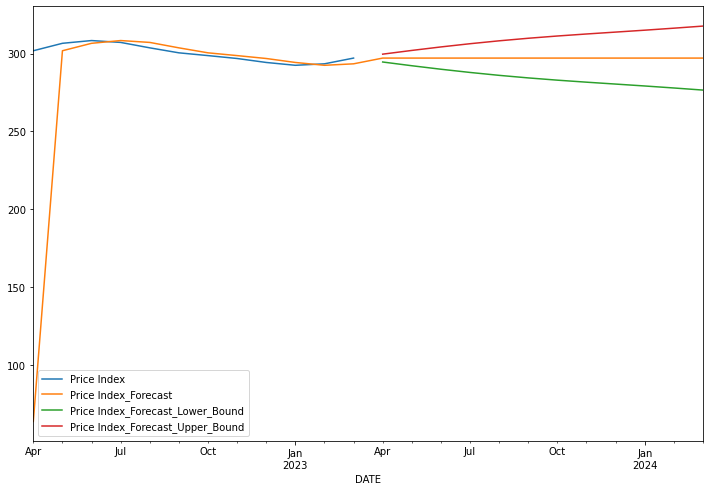

In [78]:
# acquire critical values and compare visually
forecast_df.plot.line('DATE', ['Price Index', 'Price Index_Forecast', 'Price Index_Forecast_Lower_Bound', 'Price Index_Forecast_Upper_Bound'], figsize=(12, 8))

In [75]:
# use the model to forecast into the future
future_df = lEngine.forecast(df, 12)
# show the forecast rows
future_df.tail(12)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.087, ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))


,DATE,Price Index,row_number,DATE_Normalized,_Price Index,_Price Index_Lag1Trend,_Price Index_Lag1Trend_residue,_Price Index_Lag1Trend_residue_zeroCycle[0.0],_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue,_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR,...,Price Index_Forecast_Upper_Bound,Price Index_Forecast_Quantile_6,Price Index_Forecast_Quantile_17,Price Index_Forecast_Quantile_28,Price Index_Forecast_Quantile_39,Price Index_Forecast_Quantile_50,Price Index_Forecast_Quantile_61,Price Index_Forecast_Quantile_72,Price Index_Forecast_Quantile_83,Price Index_Forecast_Quantile_94
435,2023-04-01,NaN,435,1.330285,NaN,1.008445,NaN,0.0,NaN,0.0,...,299.595404,294.94358,295.19401,295.45616,295.79930,296.2715,296.71082,296.85412,296.98891,297.29302
436,2023-05-01,NaN,436,1.333300,NaN,1.008445,NaN,0.0,NaN,0.0,...,301.988760,292.79594,293.47049,293.82752,294.54507,295.5075,296.21788,296.66580,296.92319,297.49102
437,2023-06-01,NaN,437,1.336415,NaN,1.008445,NaN,0.0,NaN,0.0,...,304.235312,290.39778,291.84689,292.51960,293.39676,294.4390,295.67379,296.14184,296.68181,297.73996
438,2023-07-01,NaN,438,1.339429,NaN,1.008445,NaN,0.0,NaN,0.0,...,306.301740,288.60588,290.66793,291.24376,292.22600,293.7900,294.85613,295.75988,296.41052,297.57728
439,2023-08-01,NaN,439,1.342544,NaN,1.008445,NaN,0.0,NaN,0.0,...,308.164916,287.26462,289.43286,290.28812,291.65314,292.6475,293.88361,295.09640,296.02672,297.38012
440,2023-09-01,NaN,440,1.345659,NaN,1.008445,NaN,0.0,NaN,0.0,...,309.806808,285.32934,288.78255,289.78196,290.62586,291.8395,293.15532,294.43820,295.45663,296.74486
441,2023-10-01,NaN,441,1.348674,NaN,1.008445,NaN,0.0,NaN,0.0,...,311.255052,283.34168,288.40848,289.13312,290.14745,291.0825,292.02731,293.44844,294.77641,296.46704
442,2023-11-01,NaN,442,1.351789,NaN,1.008445,NaN,0.0,NaN,0.0,...,312.548848,282.35784,287.80617,288.64104,289.42537,290.4395,291.51607,292.45264,293.65446,295.34832
443,2023-12-01,NaN,443,1.354803,NaN,1.008445,NaN,0.0,NaN,0.0,...,313.767968,282.10344,287.52644,288.42388,289.11136,289.7135,290.56939,291.58700,292.51622,294.25874
444,2024-01-01,NaN,444,1.357918,NaN,1.008445,NaN,0.0,NaN,0.0,...,314.990224,281.96896,287.10039,288.11980,288.70693,289.1880,289.86500,290.50652,291.46392,293.26438


In [62]:
# add an additional 12 months of blank data to the original dataframe
df2 = df.append(pd.DataFrame({'DATE': pd.date_range(start='2023-04-01', periods=12, freq='MS')}))
df2['index'] = range(0, len(df2))
df2.set_index('index', inplace=True)
df2.tail(24)


,DATE,Price Index
index,,
423,2022-04-01,301.789
424,2022-05-01,306.569
425,2022-06-01,308.334
426,2022-07-01,307.135
427,2022-08-01,303.649
428,2022-09-01,300.451
429,2022-10-01,298.672
430,2022-11-01,296.809
431,2022-12-01,294.266


In [63]:
# fill the price index forecast column with the forecast data
df2['Price Index_Forecast'] = future_df['Price Index_Forecast'].values
# for values after 2023-03-01, fill with NaN
for i in range(0, 12):
    df2['Price Index_Forecast'][len(df2)-12+i] = np.nan
    
# for values after 2023-03-01, fill with Price Index_Forecast_Quantile_6
df2['Price Index_Forecast'].fillna(value=future_df['Price Index_Forecast_Quantile_6'], inplace=True)
df2.tail(36)

,DATE,Price Index,Price Index_Forecast
index,,,
411,2021-04-01,249.859,244.26400
412,2021-05-01,255.484,249.85900
413,2021-06-01,261.207,255.48400
414,2021-07-01,265.542,261.20700
415,2021-08-01,268.820,265.54200
416,2021-09-01,271.477,268.82000
417,2021-10-01,273.693,271.47700
418,2021-11-01,276.070,273.69300
419,2021-12-01,278.653,276.07000


In [92]:
# use plotly to chart the price index and forecast
fig = px.line(df2, x='DATE', y=['Price Index', 'Price Index_Forecast'])
# zoom in on data after 2022
fig.update_xaxes(range=['2010-01-01', '2024-01-01'])
# add a title
fig.update_layout(title='U.S. Housing Price Index Forecast')
# add a vertical line to show where the forecast begins
fig.add_vline(x='2022-04-01', line_width=3, line_dash='dash', line_color='red')
# save the chart as a png
fig.write_image('images/us_housing_price_forecast.png')
fig.show()